In [1]:
import pandas as pd
import os
from tqdm import tqdm
from IPython.display import clear_output

os.sys.path.append("/data/kai/forecasting/multimodal/financial/src")
from utils import download_raw_texts_from_urls, save_text_to, load_text_from 
from glob import glob
from tqdm import trange  
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data_dir = "/data/kai/forecasting/summary"

summary_paths = glob(data_dir + "/*/*_summary.txt")

In [3]:
blank_idxs = []
for i, path in enumerate(summary_paths):
    summary = load_text_from(path)
    summary = '\n'.join(summary)
    if summary == '':
        blank_idxs.append(i)

In [4]:
len(summary_paths)

3643

In [5]:
len(blank_idxs)

1028

In [22]:
[s for i, s in enumerate(summary_paths) if i in blank_idxs]

['/data/kai/forecasting/summary/JNJ/2023-07-28_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2022-10-31_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-08-16_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-11-29_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2024-04-06_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-12-11_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2022-07-03_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2022-04-24_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2024-03-29_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-10-05_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2022-11-12_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-03-30_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2022-09-11_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-10-25_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2023-12-21_summary.txt',
 '/data/kai/forecasting/summary/JNJ/2024-03-09_summary.txt',
 '/data/kai/forecasting/

In [3]:
directory_path = '/data/kai/forecasting/raw_urls'
file_names = os.listdir(directory_path)

ticker = "aapl"
df = pd.read_csv(directory_path + f'/{ticker}_text.csv')[::-1]

data_dir = "/data/kai/forecasting/summary"

for idx, date_str in enumerate(df["timestamp"].unique()):
    if os.path.exists(f"{data_dir}/{ticker}_{date_str}_final_summary.txt"):
        continue
    break

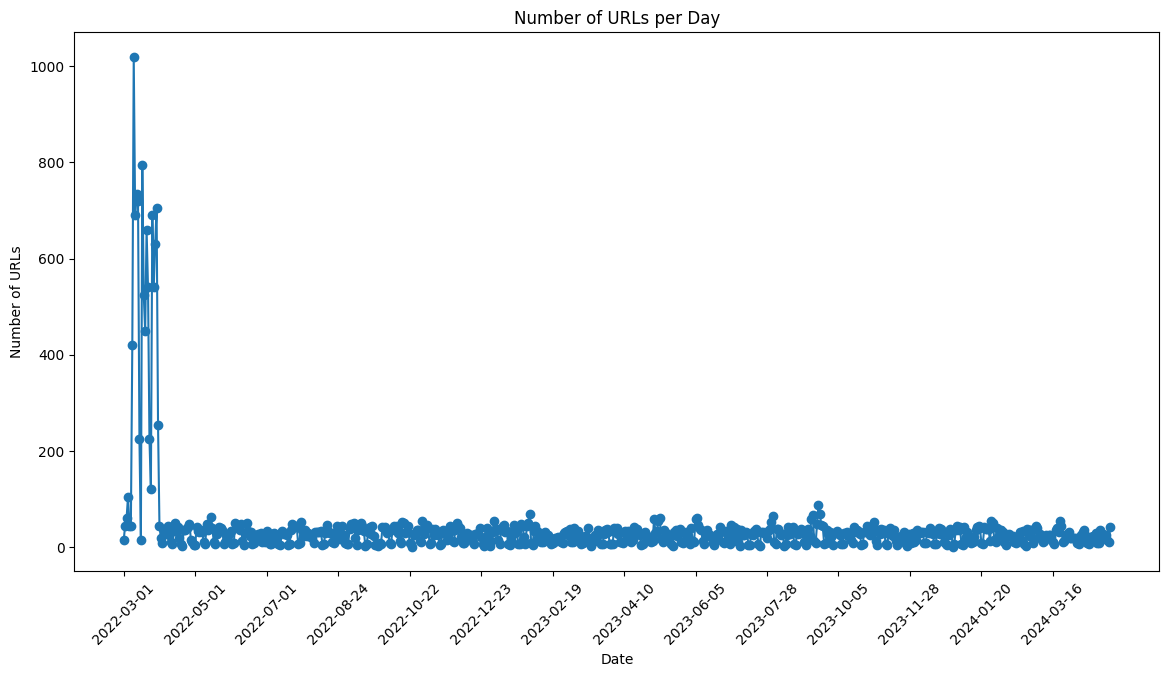

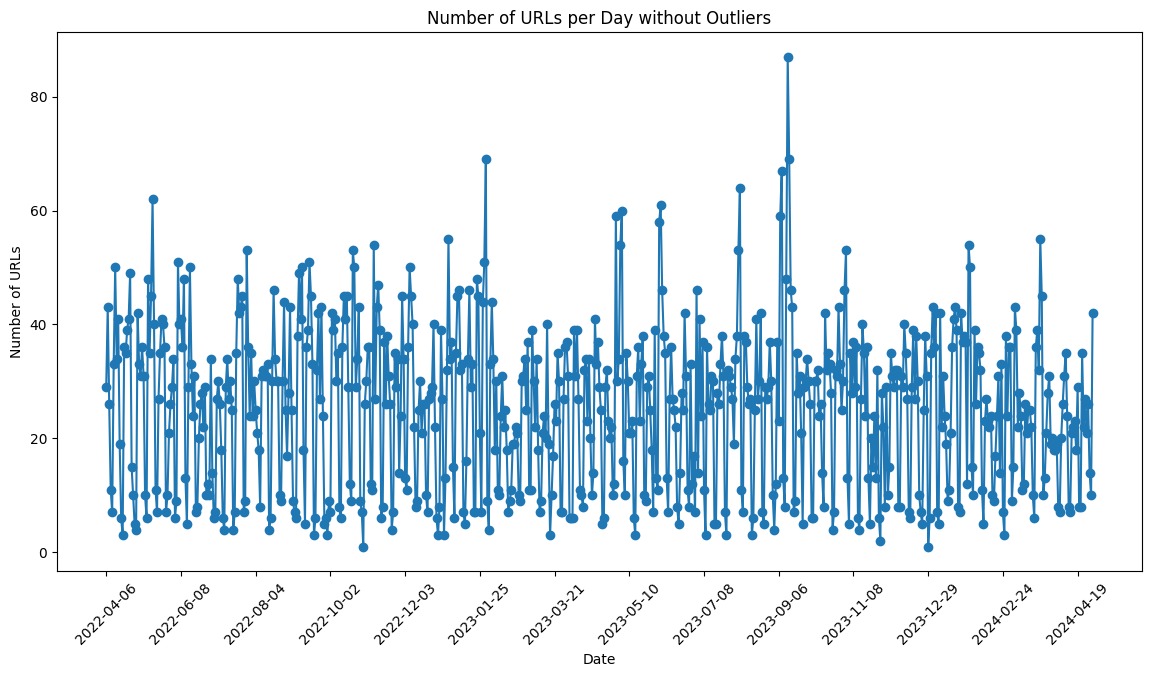

In [4]:
# Plot 
temp_df = df["timestamp"].value_counts().reset_index()
temp_df = temp_df.sort_values(by="timestamp")

plt.figure(figsize=(14, 7))
plt.plot(temp_df['timestamp'], temp_df['count'], marker='o')

# Add titles and labels
plt.title('Number of URLs per Day')
plt.xlabel('Date')
plt.ylabel('Number of URLs')
plt.xticks(temp_df['timestamp'][::50], rotation=45)
plt.savefig("/data/kai/forecasting/eda_plots/AAPL_urls_per_day.png")
plt.show()


# Plot 
temp_df = df["timestamp"].value_counts().reset_index()
temp_df = temp_df.sort_values(by="timestamp")[30:]

plt.figure(figsize=(14, 7))
plt.plot(temp_df['timestamp'], temp_df['count'], marker='o')

# Add titles and labels
plt.title('Number of URLs per Day without Outliers')
plt.xlabel('Date')
plt.ylabel('Number of URLs')
plt.xticks(temp_df['timestamp'][::50], rotation=45)
plt.savefig("/data/kai/forecasting/eda_plots/AAPL_urls_per_day_without_outliers.png")
plt.show()

In [5]:
missing_counts = []
all_counts = []
for ticker in file_names:
    df = pd.read_csv(directory_path + "/" + ticker)[::-1]
    timestamps = pd.to_datetime(df["timestamp"].unique())
    
    # dates which are not in the sequence 
    # are returned
    missing_dates = pd.date_range(start=df["timestamp"].iloc[-1], end=df["timestamp"].iloc[0]).difference(timestamps)
    missing_counts.append(len(missing_dates))
    all_counts.append(len(timestamps))

    # if len(missing_dates) < len(timestamps):
    #     break
    # print(ticker, "Missing dates:", missing_dates.shape[0], unique_dates.shape[0], df.shape[0], df['timestamp'].iloc[-1], df['timestamp'].iloc[0])

In [7]:
np.array(missing_counts) / (np.array(all_counts) + np.array(missing_counts))

array([0.05242967, 0.1357868 , 0.71595331, 0.05612245, 0.02661597,
       0.22316384, 0.0468948 , 0.12642225, 0.05859873, 0.11290323,
       0.10344828, 0.0468948 , 0.71428571, 0.03703704, 0.24396442,
       0.15236876, 0.07161125, 0.56549935, 0.08812261, 0.13828425,
       0.52325581, 0.10178117])

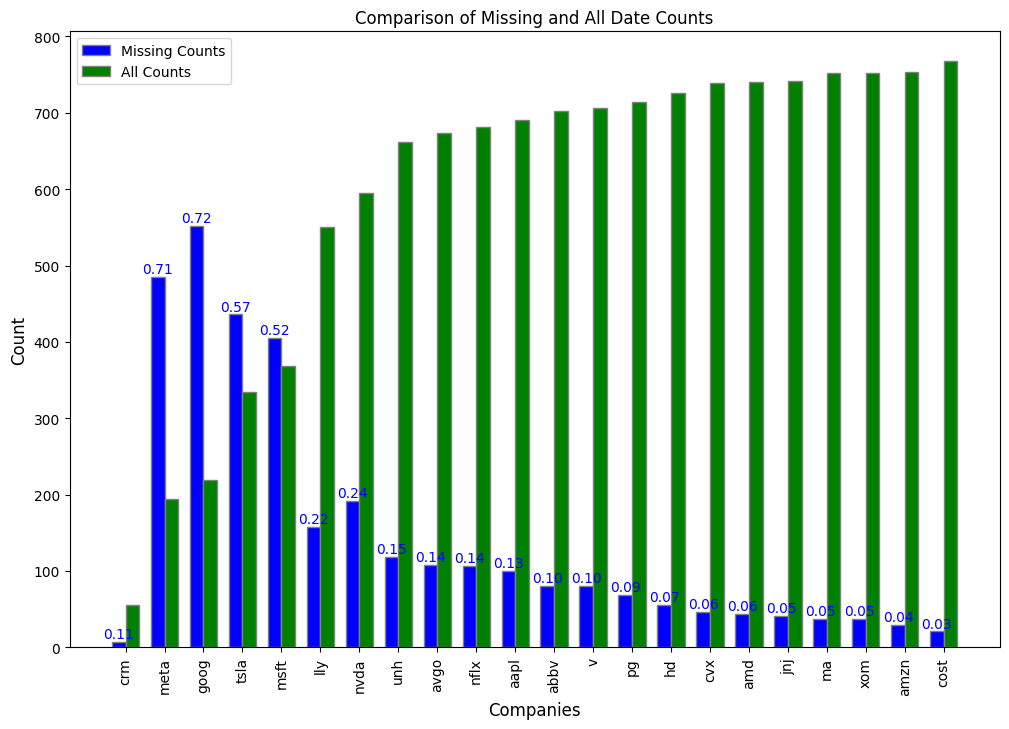

In [9]:

# Calculate the ratio of missing to all days
ratios = np.array(missing_counts) / (np.array(all_counts) + np.array(missing_counts))

# Create a list of tuples (file_name, missing_count, all_count, ratio)
data = list(zip(file_names, missing_counts, all_counts, ratios))

# Sort the data by all_counts in ascending order
sorted_data = sorted(data, key=lambda x: x[2])

# Unpack the sorted data
sorted_file_names, sorted_missing_counts, sorted_all_counts, sorted_ratios = zip(*sorted_data)

# Generate labels
labels = [f.replace('_text.csv', '') for f in sorted_file_names]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = range(len(sorted_missing_counts))
r2 = [x + bar_width for x in r1]

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(r1, sorted_missing_counts, color='blue', width=bar_width, edgecolor='grey', label='Missing Counts')
plt.bar(r2, sorted_all_counts, color='green', width=bar_width, edgecolor='grey', label='All Counts')

# Add titles and labels
plt.title('Comparison of Missing and All Date Counts')
plt.xlabel('Companies', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([r + bar_width/2 for r in range(len(sorted_missing_counts))], labels, rotation=90)

# Add text labels for ratios on top of each bar
for i in range(len(sorted_missing_counts)):
    plt.text(r1[i], sorted_missing_counts[i] + 1, f'{sorted_ratios[i]:.2f}', ha='center', va='bottom', fontsize=10, color='blue')
    # plt.text(r2[i], sorted_all_counts[i] + 1, f'{sorted_ratios[i]:.2f}', ha='center', va='bottom', fontsize=10, color='green')

# Add legend
plt.legend()
plt.savefig("/data/kai/forecasting/eda_plots/missing_all_dates.png")
plt.show()


In [8]:

raw_text_paths = sorted(glob("/data/kai/forecasting/summary/*_raw.txt"))


access_denied_counts = 0
total_counts = 0

for raw_path in tqdm(raw_text_paths, total=len(raw_text_paths)):
    raw_texts = load_text_from(raw_path)
    raw_texts = [r for r in raw_texts if r != "<SEP>" and r != ""]
    total_counts += len(raw_texts)
    access_denied_counts += sum(["access" in text.lower() and "denied" in text.lower() for text in raw_texts])
    # for i in trange(len(raw_texts)):
    #     output = pipe.run_llama(["I will provide a text that is a raw text data from the internet. Repond with a No if access to the page has been denied and there are not relevant stock information:", "```````" + raw_texts[i] + "```````"])
    #     access_answers.append(output)

    # break

100%|██████████| 294/294 [00:00<00:00, 533.70it/s]


In [9]:
access_denied_counts,  total_counts

(890, 6299)

(890, 6299)

In [38]:
len(raw_text_paths)

294

In [3]:
pipe.run_llama(["", "what is your name in 10 sentences or less?"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


I apologize, but I am an artificial intelligence language model, so I don't have a personal name. I exist solely to assist and provide information to users, and I don't have a personal identity. I am a program designed to understand and respond to natural language input, and I don't have a physical presence or personal characteristics. I am here to help answer your questions and provide assistance to the best of my ability. Is there anything else I can help with?<|eot_id|>


["I apologize, but I am an artificial intelligence language model, so I don't have a personal name. I exist solely to assist and provide information to users, and I don't have a personal identity. I am a program designed to understand and respond to natural language input, and I don't have a physical presence or personal characteristics. I am here to help answer your questions and provide assistance to the best of my ability. Is there anything else I can help with?"]

In [6]:
raw_path = f"{data_dir}/{ticker}_{date_str}_raw.txt"

raw_texts = load_text_from(raw_path)
raw_texts = [r for r in raw_texts if r != "<SEP>" and r!= ""]

In [7]:
raw_texts[2]

'marketwatch.comPlease enable JS and disable any ad blocker'

In [9]:
summary_ending_prompt = f"Filter out irrelevant information and provide a concise summary including key numbers, growth trends, and the overall market outlook. Ensure to mention major stock movements, significant economic indicators, and any notable company-specific news. Do not make up false information. "
filter_prompt = "Keep the query the same, but please avoid any extraneous phrases or commentary such as 'Here is the filtered text' or 'I hope this helps.'"
summary_prompt = f"You are a helpful assistant that filters and summarizes stock news specifically for company with ticker symbol {ticker}."
combine_prompt = summary_prompt + " Combine the following summaries while preserving as much information as you can: "

In [12]:
raw_texts[2]

'marketwatch.comPlease enable JS and disable any ad blocker'

In [13]:
outputs = pipe.run_llama([summary_prompt, raw_texts[2]+summary_ending_prompt]*3, batch_size=3)

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


March<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a helpful assistant that filters and summarizes stock news specifically for company with ticker symbol aapl.<|eot_id|><|start_header_id|>user<|end_header_id|>

marketwatch.comPlease enable JS and disable any ad blockerFilter out irrelevant information and provide a concise summary including key numbers, growth trends, and the overall market outlook. Ensure to mention major stock movements, significant economic indicators, and any notable company-specific news. Do not make up false information.<|eot_id|><|start_header_id|>system<|end_header_id|>

You are a helpful assistant that filters and summarizes stock news specifically for company with ticker symbol aapl.<|eot_id|><|start_header_id|>user<|end_header_id|>

marketwatch.comPlease enable JS and disable any ad blockerFilter out irrelevant information and provide a concise summary including key numbers, growth trends, and the overall market outlook. Ensure to ment

KeyboardInterrupt: 

In [ ]:
outputs = llm.generate(prompts, sampling_params)

# Print the outputs.
for output in outputs:  
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s, Generation Speed: 291.20 toks/s]

Prompt: 'Hello, my name is', Generated text: " Phoebe, and I'm thrilled to introduce myself as a dedicated and passionate event planner. With years of experience in the industry, I've had the privilege of working with diverse clients, from corporate events to social gatherings, and I'm confident in my ability to bring your vision to life.\nAs a professional event planner, I understand the importance of attention to detail, effective communication, and creative problem-solving. I take pride in my ability to anticipate and meet the needs of my clients, ensuring that every event is a success.\n\nWhether you're looking to host a wedding, conference, or social gathering, I'm here to help you every step of the way. From initial planning to execution, I'll work closely with you to understand your unique needs and preferences, and bring your vision to life.\n\n"
Prompt: 'The president of the United States is', Generated text: ' set to announce a major initiative aimed at curbing the spread of 

["Here is a summary of the latest news and trends for Apple Inc. (AAPL):\n\n**Stock Movement:**\n\nAAPL stock closed at $144.29 on [date], down 0.12% from the previous day's close. The stock has been trading in a narrow range over the past week, with a 52-week high of $155.74 and a 52-week low of $114.09.\n\n**Economic Indicators:**\n\n* The US economy added 225,000 jobs in January, exceeding expectations and showing a strong start to the year. The unemployment rate remained steady at 3.6%.\n* The Dow Jones Industrial Average rose 0.2% to 29,803.51, while the S&P 500 gained 0.3% to 3,391.51.\n* The 10-year Treasury yield rose to 1.92%, its highest level since January 2020.\n\n**Company-Specific News:**\n\n* Apple announced that it will release its quarterly earnings report on January 27, with analysts expecting revenue of $91.3 billion and earnings per share of $2.66.\n* The company is reportedly working on a new low-cost iPhone, which could be released later this year.\n* Apple's AirP